# Multi Class Classification
This Jupyter Notebook takes multiclass text data and classifies them.

Following models are used to classify, and the performance metrics are used to visualize each model's performance:
- `scikit-learn` Models:
    - Logistic Regression
    - Naive Bayes
    - SVM (Support Vector Machine)
    - Gradient Boosting
- CNN (Convolutional Neural Network) Model
- BERT Transformer Pre-Trained Model

## 0. Import Libraries

In [1]:
import pandas as pd
from utils import *
from model_sklearn import *
from model_cnn import *
from model_bert import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/jiwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jiwon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jiwon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jiwon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jiwon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Data Preprocessing
Note that the [News Classification](https://www.kaggle.com/datasets/kishanyadav/inshort-news) dataset from [Kaggle](https://www.kaggle.com) is used for this demo.

If there is an encoding issue with your BYOD, refer to the following encoding options: https://stackoverflow.com/a/45530363

In [2]:
df1 = pd.read_csv('data/inshort_news_data-1.csv', encoding='utf-8') # read first dataset
df2 = pd.read_csv('data/inshort_news_data-2.csv', encoding='utf-8') # read second dataset
df = pd.concat([df1, df2]) # merge them into one

df, le_name_mapping = encode_label(df)
print(le_name_mapping)

df['clean_text'] = df['text'].apply(lambda x: text_preprocess(x)) # preprocess text data
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["target"], test_size=0.2, shuffle=True) # 8:2 = train:test set split = d

{'automobile': 0, 'entertainment': 1, 'politics': 2, 'science': 3, 'sports': 4, 'technology': 5, 'world': 6}


## 2. EDA (Exploratory Data Analysis)
In this step, the input text data is getting analyzed.

Following information will be displayed:
- Data distribution per label
- Word count for each label
- Character count for each label
- Unique word count for each label

Data Distribution Per Label
6    1244
1    1220
4    1081
5     976
2     771
3     614
0     474
Name: target, dtype: int64


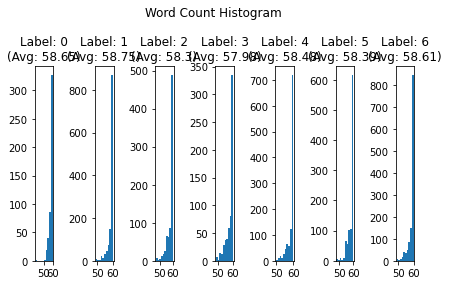

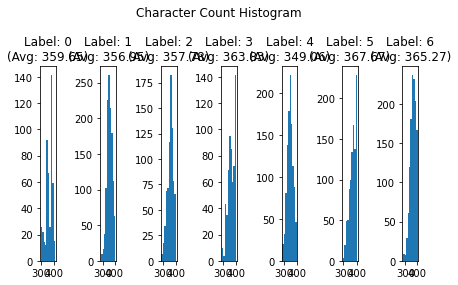

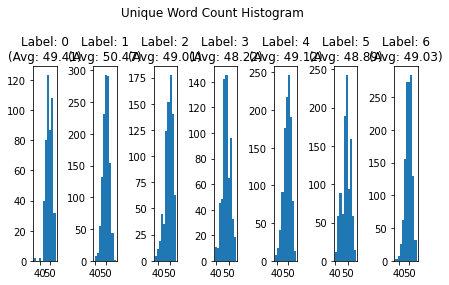

In [3]:
print("Data Distribution Per Label")
print(df['target'].value_counts())
word_count(df).show()
char_count(df).show()
unique_word_count(df).show()

## 3. TF-IDF
TF-IDF vectorize is required for scikit-learn models are required.

In [4]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=False, stop_words='english')
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) # tfidf runs on non-tokenized sentences
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) # no fit/train for test data, only transform

## 4. Scikit-Learn Model
Following models are getting trained and make predictions:
- Logistic Regression
- Naive Bayes
- SVM (Support Vector Machine)
- Gradient Boosting

Model:	 Logistic Regression

Train:	 0.1136 seconds
Train CPU(%):	 14.7
Train RAM(GB):	 11.92
Train RAM(%):	 37.4

Predict: 0.0004 seconds
Predict CPU(%):	 0.0
Predict RAM(GB): 11.92
Predict RAM(%):	 37.4

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        90
           1       0.97      0.97      0.97       246
           2       0.99      0.99      0.99       151
           3       0.93      0.92      0.93       129
           4       0.99      0.96      0.98       229
           5       0.89      0.87      0.88       188
           6       0.90      0.93      0.92       243

    accuracy                           0.94      1276
   macro avg       0.94      0.94      0.94      1276
weighted avg       0.94      0.94      0.94      1276



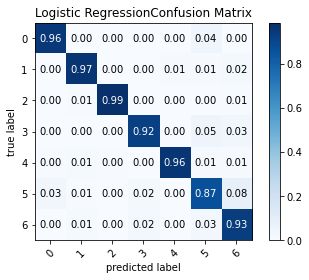

Model:	 Naive Bayes

Train:	 0.0028 seconds
Train CPU(%):	 25.4
Train RAM(GB):	 11.93
Train RAM(%):	 37.4

Predict: 0.0005 seconds
Predict CPU(%):	 0.0
Predict RAM(GB): 11.93
Predict RAM(%):	 37.4

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        90
           1       0.98      0.96      0.97       246
           2       0.98      0.97      0.98       151
           3       0.94      0.87      0.90       129
           4       0.98      0.97      0.97       229
           5       0.87      0.86      0.87       188
           6       0.86      0.94      0.90       243

    accuracy                           0.93      1276
   macro avg       0.93      0.93      0.93      1276
weighted avg       0.93      0.93      0.93      1276



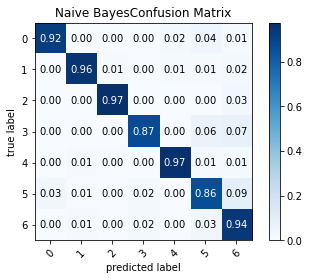

Model:	 SVM

Train:	 22.1507 seconds
Train CPU(%):	 13.3
Train RAM(GB):	 11.92
Train RAM(%):	 37.4

Predict: 0.6054 seconds
Predict CPU(%):	 14.7
Predict RAM(GB): 11.9
Predict RAM(%):	 37.3

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.98      0.96      0.97       246
           2       1.00      0.99      0.99       151
           3       0.94      0.94      0.94       129
           4       0.99      0.97      0.98       229
           5       0.87      0.89      0.88       188
           6       0.92      0.93      0.92       243

    accuracy                           0.95      1276
   macro avg       0.95      0.95      0.95      1276
weighted avg       0.95      0.95      0.95      1276



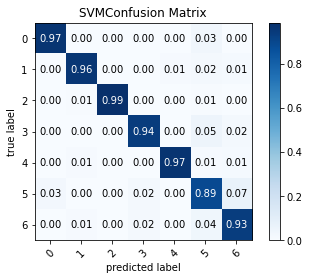

Model:	 Gradient Boosting

Train:	 13.3964 seconds
Train CPU(%):	 13.3
Train RAM(GB):	 11.91
Train RAM(%):	 37.3

Predict: 0.0063 seconds
Predict CPU(%):	 22.2
Predict RAM(GB): 11.91
Predict RAM(%):	 37.3

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        90
           1       0.97      0.93      0.95       246
           2       0.98      0.97      0.97       151
           3       0.91      0.91      0.91       129
           4       0.99      0.95      0.97       229
           5       0.92      0.82      0.87       188
           6       0.82      0.94      0.88       243

    accuracy                           0.93      1276
   macro avg       0.93      0.93      0.93      1276
weighted avg       0.93      0.93      0.93      1276



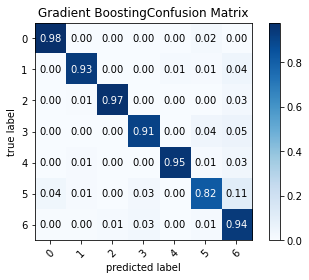

In [5]:
lg_model = Logistic(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
lg_model.runner()

nb_model = NaiveBayes(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
nb_model.runner()

svm_model = SVM(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
svm_model.runner()

gb_model = GradientBoosting(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
gb_model.runner()

## 5. CNN (Convolutional Neural Network) Model

Virtual devices cannot be modified after being initialized
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 60, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 250)               240250    
                                                                 
 dropout (Dropout)           (None, 250)               0       

2022-05-14 00:06:56.690121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 00:06:56.694478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 00:06:56.694607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 00:06:56.695130: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model:	 Multi CNN



0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-05-14 00:06:58.034353: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-05-14 00:06:58.725420: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Train:	 20.5636 seconds
Train CPU(%):	 16.8
Train RAM(GB):	 14.24
Train RAM(%):	 44.3

Predict: 0.0831 seconds
Predict CPU(%):	 14.6
Predict RAM(GB): 14.24
Predict RAM(%):	 44.3

Accuracy: 93.73%
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        90
           1       0.97      0.95      0.96       246
           2       0.97      0.99      0.98       151
           3       0.93      0.89      0.91       129
           4       0.98      0.99      0.98       229
           5       0.86      0.90      0.88       188
           6       0.90      0.90      0.90       243

    accuracy                           0.94      1276
   macro avg       0.94      0.94      0.94      1276
weighted avg       0.94      0.94      0.94      1276



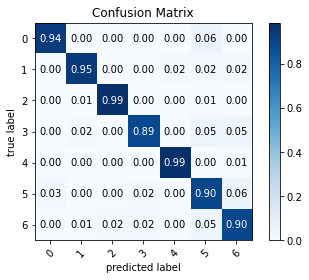

In [6]:
max_words = get_max_words(df)
num_class = len(le_name_mapping)
cnn_model = CNNMulti(X_train, y_train, X_test, y_test, max_words, num_class)
cnn_model.runner()

## 6. BERT Transformer Pre-Trained Model

Virtual devices cannot be modified after being initialized
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Train:	 1171.0472 seconds
Train CPU(%):	 15.0
Train RAM(GB):	 15.05
Train RAM(%):	 46.7

Predict: 3.7422 seconds
Predict CPU(%):	 16.7
Predict RAM(GB): 15.08
Predict RAM(%):	 46.8

Accuracy: 95.38%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.95      0.96       246
           2       1.00      0.97      0.99       151
           3       0.94      0.93      0.94       129
           4       0.99      0.99      0.99       229
           5       0.89      0.90      0.89       188
           6       0.93      0.95      0.94       243

    accuracy                           0.95      1276
   macro avg       0.95      0.96      0.95      1276
weighted avg       0.95      0.95      0.95      1276



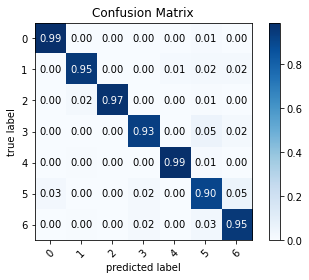

In [7]:
num_class = len(le_name_mapping)
nn_model = BERTMulti(X_train, y_train, X_test, y_test, num_class)
nn_model.runner()